# Integral cross section

At electron energies $11.94eV$ and $12.14eV$ comes resonant scattering by exciting $E(^3\Sigma_g^+ \nu)$ stanja molekula $N_2$. Based on symmetry, cross section follows relation:

\begin{equation}
\sigma(\theta) = A + B \cos^2\theta
\end{equation}

Based on this formula and data we can calculate integral cross section.

# Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.integrate import quad

In [2]:
data_1 = pd.DataFrame({
    "theta": 
        np.array([15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]),
    "cross section":
        np.array([7.17, 8.03, 7.76, 6.59, 5.68, 4.31, 2.68, 3.59, 2.2, 2.36, 3.49, 4.18])
})

In [3]:
data_2 = pd.DataFrame({
    "theta": 
        np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 128]),
    "cross section":
        np.array([7.2, 6.98, 5.76, 4.56, 3.01, 2.86, 1.93, 1.2, 1.2, 1.52, 2.19, 2.9, 4.06])
})

In [4]:
def cross_section_fit(theta, *args):
    return args[0] + args[1] * np.cos(np.pi * (theta - args[2]) / args[3]) ** 2

In [5]:
popt_1, _ = curve_fit(cross_section_fit, data_1["theta"], data_1["cross section"],
                     p0=[2.5, 5.3, -50, 140],
                     maxfev=8000)

In [6]:
popt_2, _ = curve_fit(cross_section_fit, data_2["theta"], data_2["cross section"],
                     p0=[2.5, 5.3, -50, 140],
                     maxfev=8000)

In [54]:
th = np.linspace(5, 135, 200)
th_ = np.linspace(0, 180, 500)

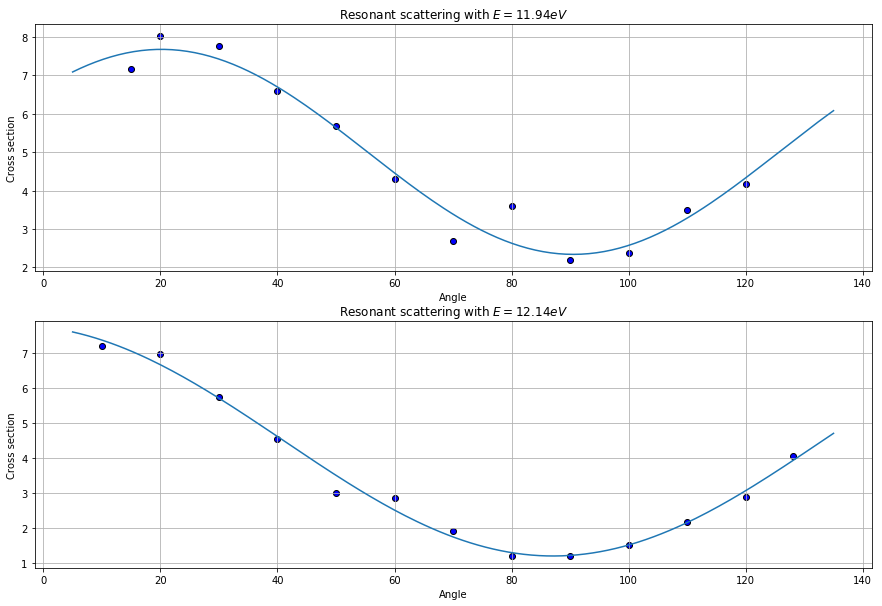

In [55]:
fig, ax = plt.subplots(2)

fig.set_figwidth(15)
fig.set_figheight(10)

ax[0].scatter(data_1["theta"], data_1["cross section"], c='b', edgecolor='k')
ax[0].plot(th, cross_section_fit(th, *popt_1))

ax[1].scatter(data_2["theta"], data_2["cross section"], c='b', edgecolor='k')
ax[1].plot(th, cross_section_fit(th, *popt_2))

ax[0].set_title(r"Resonant scattering with $E=11.94eV$")
ax[1].set_title(r"Resonant scattering with $E=12.14eV$")

for axx in ax:
    axx.set_ylabel("Cross section")
    axx.set_xlabel("Angle")
    axx.grid()

## Extrapolated curves

Text(0.5, 0, 'Angle')

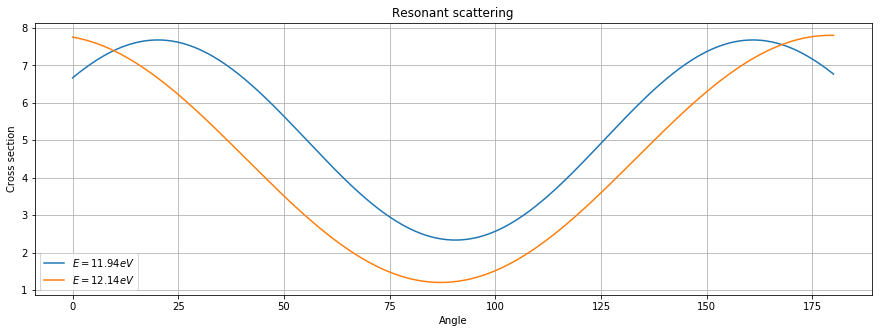

In [56]:
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(5)

ax.plot(th_, cross_section_fit(th_, *popt_1), label=r'$E=11.94eV$')
ax.plot(th_, cross_section_fit(th_, *popt_2), label=r'$E=12.14eV$')

ax.legend()
ax.grid()
ax.set_title(r"Resonant scattering")
ax.set_ylabel("Cross section")
ax.set_xlabel("Angle")

## Integrated

In [57]:
def integrate(theta, curve, args):
    fun = lambda x: curve(x, *args)
    step_by_step = np.fromiter((quad(fun, a, b)[0] 
                                for a, b in zip(theta[:-1], theta[1:])), 
                               dtype=np.float64)
    return np.fromiter((np.sum(step_by_step[:i]) 
                        for i in range(step_by_step.shape[0])), 
                       dtype=np.float64)

In [58]:
i_1 = integrate(th_, cross_section_fit, popt_1)

In [59]:
i_2 = integrate(th_, cross_section_fit, popt_2)

Text(0.5, 0, 'Angle')

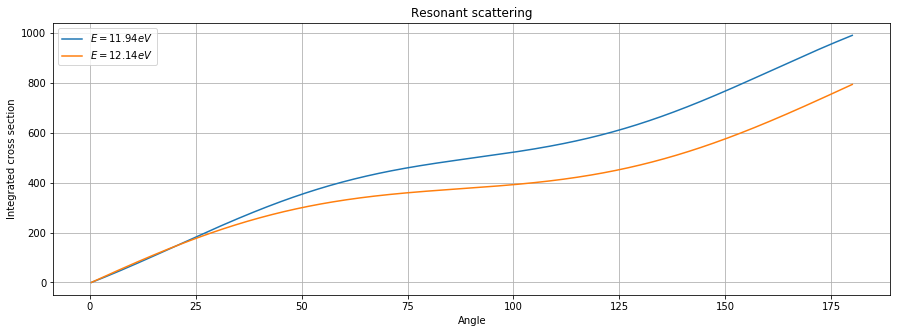

In [60]:
fig, ax = plt.subplots()

fig.set_figwidth(15)
fig.set_figheight(5)

ax.plot(th_[1:], i_1, label=r'$E=11.94eV$')
ax.plot(th_[1:], i_2, label=r'$E=12.14eV$')

ax.legend()
ax.grid()
ax.set_title(r"Resonant scattering")
ax.set_ylabel("Integrated cross section")
ax.set_xlabel("Angle")

# Conclusion - What is cross section??